In [143]:
cd /files_for_calculating_gradients_single_subject

/om/user/xaviergp


In [1]:
import nibabel as nib
import nibabel.gifti
import nilearn
from nilearn import datasets, plotting
import sys
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as plt
from matplotlib.colors import ListedColormap
mpl.rcParams['svg.fonttype'] = 'none'
import sys
sys.path.append('gradient_data/src/')
import matplotlib.cm as cm
import scipy as scipy
import scipy.cluster as scipycluster
from PIL import Image
import subprocess

/om/user/xaviergp/env/xavier_env/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
### Individual subject task z maps as provided by HCP (e.g. singles_s4_language.dscalar.nii) were transformed
### so that they would include cerebellum data only as follows:
### wb_command -cifti-restrict-dense-map singles_s4_language.dscalar.nii COLUMN singles_s4_language_cerebellumonly.dscalar.nii -vol-roi Cerebellum-MNIfnirt-maxprob-thr25.nii

### Individual subject task z maps as provided by HCP contain 4mm smoothing.
### We applied an additional smoothing with sigma=2 with the following command:
### wb_command cifti-smoothing singles_s4_language_cerebellumonly.dscalar.nii 2 2 COLUMN singles_s4_language_cerebellumonly_plusciftismoothing2.dscalar.nii


In [146]:
LANG = nib.load('/tasks/singles_s4_language_cerebellumonly_plusciftismoothing2.dscalar.nii').get_data()
LANG = LANG[3]
WM = nib.load('/tasks/singles_s4_wm_cerebellumonly_plusciftismoothing2.dscalar.nii').get_data()
WM = WM[3]
EMOTION = nib.load('/tasks/singles_s4_emotion_cerebellumonly_plusciftismoothing2.dscalar.nii').get_data()
EMOTION = EMOTION[2]
MOTOR = nib.load('/tasks/singles_s4_motor_cerebellumonly_plusciftismoothing2.dscalar.nii').get_data()
MOTORLF = MOTOR[8]
MOTORRF = MOTOR[10]
MOTORLH = MOTOR[9]
MOTORRH = MOTOR[11]
MOTORT = MOTOR[12]
SOCIAL = nib.load('/tasks/singles_s4_social_cerebellumonly_plusciftismoothing2.dscalar.nii').get_data()
SOCIAL = SOCIAL[5]
### These are the dscalar maps that correspond to our contrast of interest (e.g. WM map 4 (i.e. WM[3]) is
### the contrast of 2back-0back)

threshold = 4 ### threshold at z >4

MOTORRH[MOTORRH < threshold] = 0
MOTORLH[MOTORLH < threshold] = 0
MOTORRF[MOTORRF < threshold] = 0
MOTORLF[MOTORLF < threshold] = 0
MOTORT[MOTORT < threshold] = 0
MOTORRH[MOTORRH > threshold] = 1
MOTORLH[MOTORLH > threshold] = 1
MOTORRF[MOTORRF > threshold] = 1
MOTORLF[MOTORLF > threshold] = 1
MOTORT[MOTORT > threshold] = 1
MOTORALL = (MOTORRH + MOTORLH + MOTORRF + MOTORLF + MOTORT)
MOTORALL[MOTORALL > threshold] = 1

LANG[LANG < threshold] = 0
WM[WM < threshold] = 0
EMOTION[EMOTION < threshold] = 0
SOCIAL[SOCIAL < threshold] = 0

LANG[LANG > threshold] = 1
WM[WM > threshold] = 1
EMOTION[EMOTION > threshold] = 1
SOCIAL[SOCIAL > threshold] = 1

NOTHING = np.zeros((17729,))

CHANNEL1 = LANG
CHANNEL2 = WM
CHANNEL3 = EMOTION
CHANNEL4 = SOCIAL
CHANNEL5 = MOTORALL
CHANNEL6 = NOTHING
CHANNEL7 = NOTHING
CHANNEL8 = NOTHING
CHANNEL9 = NOTHING
CHANNEL10 = NOTHING

CHANNEL1_R = np.zeros((17729,))
CHANNEL1_G = np.zeros((17729,))
CHANNEL1_B = np.zeros((17729,))
CHANNEL2_R = np.zeros((17729,))
CHANNEL2_G = np.zeros((17729,))
CHANNEL2_B = np.zeros((17729,))
CHANNEL3_R = np.zeros((17729,))
CHANNEL3_G = np.zeros((17729,))
CHANNEL3_B = np.zeros((17729,))
CHANNEL4_R = np.zeros((17729,))
CHANNEL4_G = np.zeros((17729,))
CHANNEL4_B = np.zeros((17729,))
CHANNEL5_R = np.zeros((17729,))
CHANNEL5_G = np.zeros((17729,))
CHANNEL5_B = np.zeros((17729,))
CHANNEL6_R = np.zeros((17729,))
CHANNEL6_G = np.zeros((17729,))
CHANNEL6_B = np.zeros((17729,))
CHANNEL7_R = np.zeros((17729,))
CHANNEL7_G = np.zeros((17729,))
CHANNEL7_B = np.zeros((17729,))
CHANNEL8_R = np.zeros((17729,))
CHANNEL8_G = np.zeros((17729,))
CHANNEL8_B = np.zeros((17729,))
CHANNEL9_R = np.zeros((17729,))
CHANNEL9_G = np.zeros((17729,))
CHANNEL9_B = np.zeros((17729,))
CHANNEL10_R = np.zeros((17729,))
CHANNEL10_G = np.zeros((17729,))
CHANNEL10_B =  np.zeros((17729,))
FINAL_CHANNEL_R = np.zeros((17729,))
FINAL_CHANNEL_G = np.zeros((17729,))
FINAL_CHANNEL_B = np.zeros((17729,))

CHANNEL1_Rvalue = 1
CHANNEL1_Gvalue = 0
CHANNEL1_Bvalue = 0

CHANNEL2_Rvalue = 0
CHANNEL2_Gvalue = 1
CHANNEL2_Bvalue = 0

CHANNEL3_Rvalue = 1
CHANNEL3_Gvalue = 1
CHANNEL3_Bvalue = 0

CHANNEL4_Rvalue = 1
CHANNEL4_Gvalue = 0
CHANNEL4_Bvalue = 1

CHANNEL5_Rvalue = 0
CHANNEL5_Gvalue = 0
CHANNEL5_Bvalue = 1

CHANNEL6_Rvalue = 0
CHANNEL6_Gvalue = 0
CHANNEL6_Bvalue = 0

CHANNEL7_Rvalue = 0
CHANNEL7_Gvalue = 0
CHANNEL7_Bvalue = 0

CHANNEL8_Rvalue = 0
CHANNEL8_Gvalue = 0
CHANNEL8_Bvalue = 0

CHANNEL9_Rvalue = 0
CHANNEL9_Gvalue = 0
CHANNEL9_Bvalue = 0

CHANNEL10_Rvalue = 0
CHANNEL10_Gvalue = 0
CHANNEL10_Bvalue = 0

CHANNEL1_R = [x+CHANNEL1_Rvalue for x in CHANNEL1_R]
CHANNEL1_R = CHANNEL1_R * CHANNEL1
CHANNEL1_G = [x+CHANNEL1_Gvalue for x in CHANNEL1_G]
CHANNEL1_G = CHANNEL1_G * CHANNEL1
CHANNEL1_B = [x+CHANNEL1_Bvalue for x in CHANNEL1_B]
CHANNEL1_B = CHANNEL1_B * CHANNEL1
CHANNEL2_R = [x+CHANNEL2_Rvalue for x in CHANNEL2_R]
CHANNEL2_R = CHANNEL2_R * CHANNEL2
CHANNEL2_G = [x+CHANNEL2_Gvalue for x in CHANNEL2_G]
CHANNEL2_G = CHANNEL2_G * CHANNEL2
CHANNEL2_B = [x+CHANNEL2_Bvalue for x in CHANNEL2_B]
CHANNEL2_B = CHANNEL2_B * CHANNEL2
CHANNEL3_R = [x+CHANNEL3_Rvalue for x in CHANNEL3_R]
CHANNEL3_R = CHANNEL3_R * CHANNEL3
CHANNEL3_G = [x+CHANNEL3_Gvalue for x in CHANNEL3_G]
CHANNEL3_G = CHANNEL3_G * CHANNEL3
CHANNEL3_B = [x+CHANNEL3_Bvalue for x in CHANNEL3_B]
CHANNEL3_B = CHANNEL3_B * CHANNEL3
CHANNEL4_R = [x+CHANNEL4_Rvalue for x in CHANNEL4_R]
CHANNEL4_R = CHANNEL4_R * CHANNEL4
CHANNEL4_G = [x+CHANNEL4_Gvalue for x in CHANNEL4_G]
CHANNEL4_G = CHANNEL4_G * CHANNEL4
CHANNEL4_B = [x+CHANNEL4_Bvalue for x in CHANNEL4_B]
CHANNEL4_B = CHANNEL4_B * CHANNEL4
CHANNEL5_R = [x+CHANNEL5_Rvalue for x in CHANNEL5_R]
CHANNEL5_R = CHANNEL5_R * CHANNEL5
CHANNEL5_G = [x+CHANNEL5_Gvalue for x in CHANNEL5_G]
CHANNEL5_G = CHANNEL5_G * CHANNEL5
CHANNEL5_B = [x+CHANNEL5_Bvalue for x in CHANNEL5_B]
CHANNEL5_B = CHANNEL5_B * CHANNEL5
CHANNEL6_R = [x+CHANNEL6_Rvalue for x in CHANNEL6_R]
CHANNEL6_R = CHANNEL6_R * CHANNEL6
CHANNEL6_G = [x+CHANNEL6_Gvalue for x in CHANNEL6_G]
CHANNEL6_G = CHANNEL6_G * CHANNEL6
CHANNEL6_B = [x+CHANNEL6_Bvalue for x in CHANNEL6_B]
CHANNEL6_B = CHANNEL6_B * CHANNEL6
CHANNEL7_R = [x+CHANNEL7_Rvalue for x in CHANNEL7_R]
CHANNEL7_R = CHANNEL7_R * CHANNEL7
CHANNEL7_G = [x+CHANNEL7_Gvalue for x in CHANNEL7_G]
CHANNEL7_G = CHANNEL7_G * CHANNEL7
CHANNEL7_B = [x+CHANNEL7_Bvalue for x in CHANNEL7_B]
CHANNEL7_B = CHANNEL7_B * CHANNEL7
CHANNEL8_R = [x+CHANNEL8_Rvalue for x in CHANNEL8_R]
CHANNEL8_R = CHANNEL8_R * CHANNEL8
CHANNEL8_G = [x+CHANNEL8_Gvalue for x in CHANNEL8_G]
CHANNEL8_G = CHANNEL8_G * CHANNEL8
CHANNEL8_B = [x+CHANNEL8_Bvalue for x in CHANNEL8_B]
CHANNEL8_B = CHANNEL8_B * CHANNEL8
CHANNEL9_R = [x+CHANNEL9_Rvalue for x in CHANNEL9_R]
CHANNEL9_R = CHANNEL9_R * CHANNEL9
CHANNEL9_G = [x+CHANNEL9_Gvalue for x in CHANNEL9_G]
CHANNEL9_G = CHANNEL9_G * CHANNEL9
CHANNEL9_B = [x+CHANNEL9_Bvalue for x in CHANNEL9_B]
CHANNEL9_B = CHANNEL9_B * CHANNEL9
CHANNEL10_R = [x+CHANNEL10_Rvalue for x in CHANNEL10_R]
CHANNEL10_R = CHANNEL10_R * CHANNEL10
CHANNEL10_G = [x+CHANNEL10_Gvalue for x in CHANNEL10_G]
CHANNEL10_G = CHANNEL10_G * CHANNEL10
CHANNEL10_B = [x+CHANNEL10_Bvalue for x in CHANNEL10_B]
CHANNEL10_B = CHANNEL10_B * CHANNEL10

FINAL_CHANNEL_R = CHANNEL1_R + CHANNEL2_R + CHANNEL3_R + CHANNEL4_R + CHANNEL5_R + CHANNEL6_R + CHANNEL7_R + CHANNEL8_R + CHANNEL9_R + CHANNEL10_R 
FINAL_CHANNEL_G = CHANNEL1_G + CHANNEL2_G + CHANNEL3_G + CHANNEL4_G + CHANNEL5_G + CHANNEL6_G + CHANNEL7_G + CHANNEL8_G + CHANNEL9_G + CHANNEL10_G 
FINAL_CHANNEL_B = CHANNEL1_B + CHANNEL2_B + CHANNEL3_B + CHANNEL4_B + CHANNEL5_B + CHANNEL6_B + CHANNEL7_B + CHANNEL8_B + CHANNEL9_B + CHANNEL10_B

c = np.ones((17729, 4))
c[:,0] = FINAL_CHANNEL_R
c[:,1] = FINAL_CHANNEL_G
c[:,2] = FINAL_CHANNEL_B

c[c > 1] = 0.5

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [147]:
gr1 = nib.load('singles_result_cerebellumonly_gradient1_smooth10.dscalar.nii').get_data()
gr2 = nib.load('singles_result_cerebellumonly_gradient2_smooth10.dscalar.nii').get_data()

### use singles_result_cerebellumonly_gradient1_smooth4.dscalar.nii and singles_result_cerebellumonly_gradient2_smooth4.dscalar.nii
### for obtaining plot of gradients with smoothing sigma =4

res_component1 = gr1[0]
res_component2 = gr2[0]

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = np.array(res_component2)


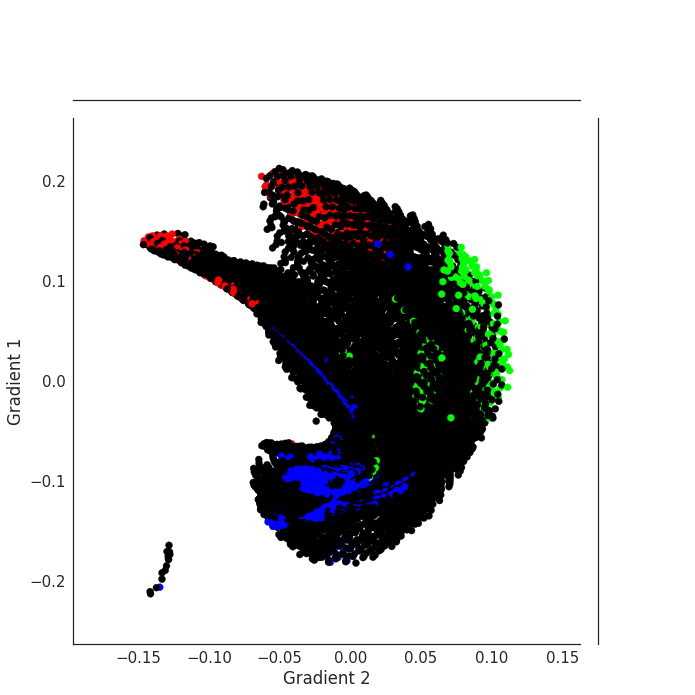

In [148]:
sns.set_context(font_scale=2)
sns.set_style("ticks", {"xtick.major.size": 0.001, "ytick.major.size": 0.001})
g = (sns.jointplot('e0', 'e1', 
                   data=df,
                   size=10, label='big', linewidth=0, marker='.', alpha=0, color='w', # alpha=0.8,
                   ylim = [np.min(df['e0']) - 0.05, np.max(df['e0']) + 0.05], 
                   xlim=[np.min(df['e1']) - 0.05, np.max(df['e1']) + 0.05], 
                   stat_func=None).set_axis_labels('Gradient 2', 'Gradient 1'))
g.ax_joint.scatter(df.e1, df.e0, c=c)
g.savefig(os.path.abspath('figure.png'), format='png', dpi=600, transparent=False)
plt.show()